In [281]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")


In [282]:
import cv2

img = cv2.imread(r"D:\ML\ML Project 2(Classification)\Model_ML\dataset\Virat Kohli\Image_1.jpg")

if img is None:
    print("❌ Image not found or path is incorrect!")
else:
    print("✅ Image loaded, shape:", img.shape)


✅ Image loaded, shape: (2252, 3377, 3)


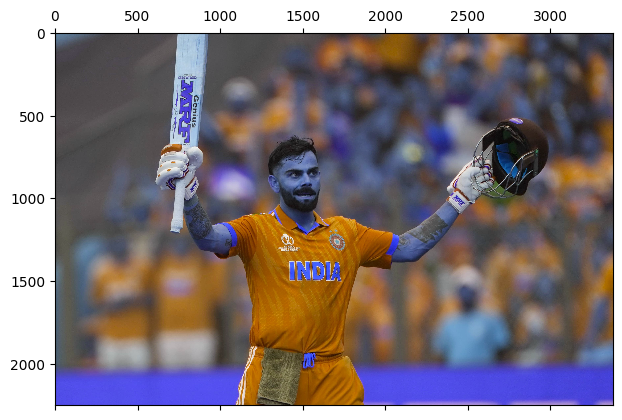

In [283]:
plt.matshow(img)

In [284]:
"""IF YOU WANT TO CHANGE THE IMAGE TO GRAY SCALE IMAGE"""

'IF YOU WANT TO CHANGE THE IMAGE TO GRAY SCALE IMAGE'

In [285]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape
# THIS REMOVES THE THIRD DIMENSION OG THE IMAGE

(2252, 3377)

In [286]:
gray

array([[133, 133, 133, ...,  71,  72,  71],
       [133, 133, 133, ...,  71,  71,  68],
       [133, 133, 133, ...,  70,  71,  66],
       ...,
       [125, 125, 125, ..., 169, 169, 170],
       [125, 125, 125, ..., 171, 170, 170],
       [126, 126, 126, ..., 172, 172, 170]], dtype=uint8)

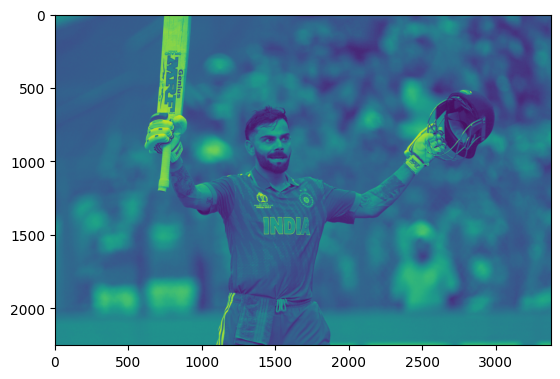

In [287]:
plt.imshow(gray)

In [288]:
"""NOW WE NEED TO DETECT THE EYES AND FACE FROM THE IMAGE USING THE OPENCV2"""

'NOW WE NEED TO DETECT THE EYES AND FACE FROM THE IMAGE USING THE OPENCV2'

In [289]:
"""WE DO USING HAAR CASCADES"""

'WE DO USING HAAR CASCADES'

In [290]:
"""IT WILL HAVE THE WINDOW WHICH WILL MOVE ALL OVER THE IMAGE AND SEARCH FOR SPECIFIC FEATURE 
 LIKE , FOR EYES , IT BECOME LIGHT COLOR IN HORIZONTAL MIDDEL AND UP AND DOWN ARE BLACK , AND FOR NOSE VERTICAL MIDDEL IS LIGHT IN COLOR AND LEFT AND RIGHT SIDE IS DARK / BLACK IN COLOR"""

'IT WILL HAVE THE WINDOW WHICH WILL MOVE ALL OVER THE IMAGE AND SEARCH FOR SPECIFIC FEATURE \n LIKE , FOR EYES , IT BECOME LIGHT COLOR IN HORIZONTAL MIDDEL AND UP AND DOWN ARE BLACK , AND FOR NOSE VERTICAL MIDDEL IS LIGHT IN COLOR AND LEFT AND RIGHT SIDE IS DARK / BLACK IN COLOR'

In [291]:
""" IN THIS PATH I HAVE THE HAAR CASCADES PREDIFINED XML FILES FOR DETECTING THE FACE OR 
  ML Project 2(Classification)/Model_ML/opencv/haarcascades"""

' IN THIS PATH I HAVE THE HAAR CASCADES PREDIFINED XML FILES FOR DETECTING THE FACE OR \n  ML Project 2(Classification)/Model_ML/opencv/haarcascades'

In [292]:
import cv2

# Load cascades from your project folder
face_cascade = cv2.CascadeClassifier(
    r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_frontalface_default.xml"
)
eye_cascade = cv2.CascadeClassifier(
    r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_eye.xml"
)

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,   # smaller step = more detections
    minNeighbors=4,    # lower value = more detections (including false positives)
    minSize=(30, 30)   # ignore very small regions
)
print("Faces:", faces)



Faces: [[1344  717  335  335]
 [1653 1182   78   78]]


In [293]:
"""DRAWING THE RECTANGE AROUND THE FACE"""

'DRAWING THE RECTANGE AROUND THE FACE'

In [294]:
(x,y,w,h)=faces[0]
x,y,w,h

(1344, 717, 335, 335)

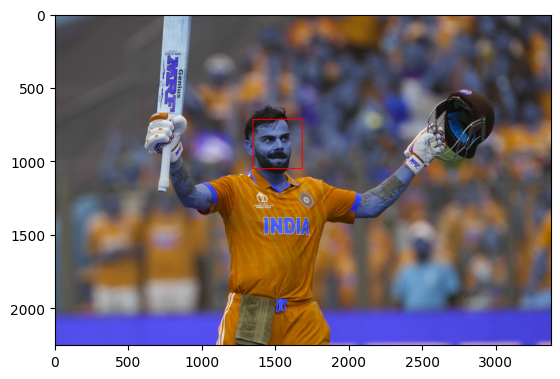

In [295]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),6)
plt.imshow(face_img)

In [296]:
"""NOW MY FACE IS VERY CLEARLY DETECTED"""

'NOW MY FACE IS VERY CLEARLY DETECTED'

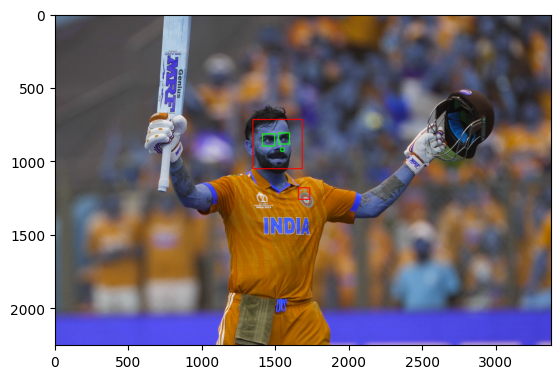

In [297]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 6)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 6)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


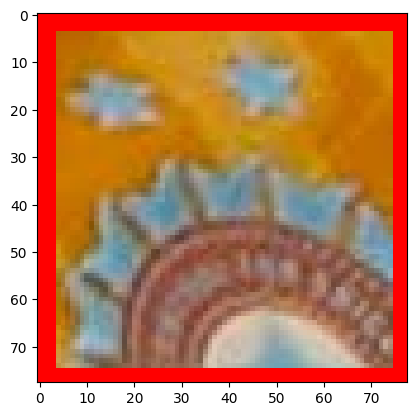

In [298]:
plt.imshow(roi_color,cmap='gray')

In [299]:
"""NOW WRITING THE FUNCTION OF DOING THE ABOVE PROCESS"""

'NOW WRITING THE FUNCTION OF DOING THE ABOVE PROCESS'

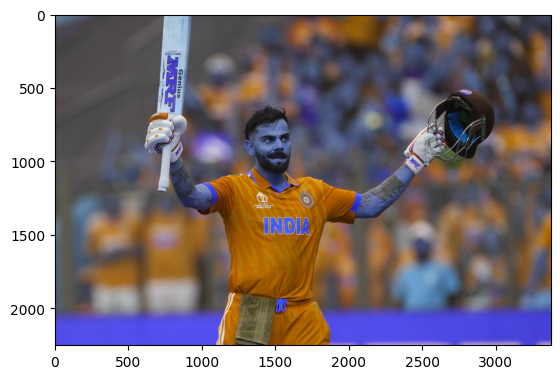

In [300]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

original_image = cv2.imread('D:\ML\ML Project 2(Classification)\Model_ML\dataset\Virat Kohli\Image_1.jpg')
plt.imshow(original_image)


In [301]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        print("Detected eyes:", len(eyes))  # debug
        if len(eyes) >= 2:
            return roi_color   # cropped face region
    
    return None   # nothing found


Detected eyes: 3


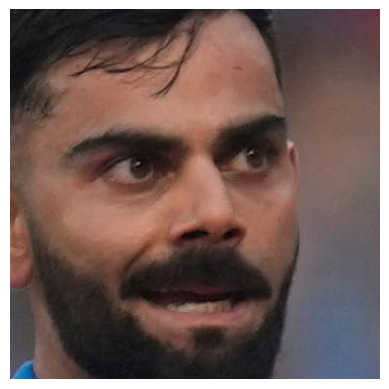

In [302]:
cropped_img = get_cropped_image_if_2_eyes(
    r"D:\ML\ML Project 2(Classification)\Model_ML\dataset\Virat Kohli\Image_1.jpg"
)

if cropped_img is not None:
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("❌ No face with 2 eyes detected")


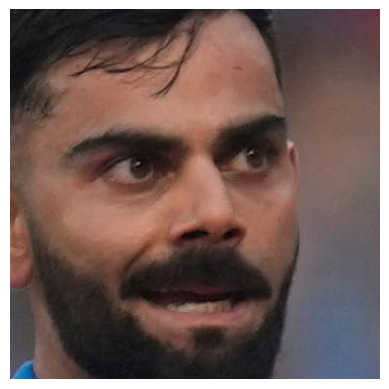

In [303]:
import cv2
import matplotlib.pyplot as plt

def get_cropped_face_with_eyes(image_path, face_cascade, eye_cascade):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color  # Return first face with 2 eyes
    return None

# Use your verified cascade paths
face_cascade = cv2.CascadeClassifier(
    r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_frontalface_default.xml"
)
eye_cascade = cv2.CascadeClassifier(
    r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_eye.xml"
)

# Path to image
image_path = r"D:\ML\ML Project 2(Classification)\Model_ML\dataset\Virat Kohli\Image_1.jpg"

# Get cropped face
cropped_img = get_cropped_face_with_eyes(image_path, face_cascade, eye_cascade)

# Display result
if cropped_img is not None:
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No face with two eyes detected.")

In [304]:
import cv2

face_cascade_path = r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_frontalface_default.xml"
eye_cascade_path = r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_eye.xml"

face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

print("Face cascade loaded:", not face_cascade.empty())
print("Eye cascade loaded:", not eye_cascade.empty())


Face cascade loaded: True
Eye cascade loaded: True


In [305]:
""" HERE WE MAKE THE SUB FOLDER FOR THE CROPPED IMAGES """

' HERE WE MAKE THE SUB FOLDER FOR THE CROPPED IMAGES '

In [306]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped/"

In [307]:
import os

path_to_data = "./dataset"
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path.replace("\\", "/"))

print(img_dirs)


['./dataset/cropped', './dataset/lionel messi', './dataset/michael jackson', './dataset/Narendra Modi', './dataset/Pawan Kalyan', './dataset/Ratan Tata', './dataset/Virat Kohli']


In [308]:
img_dirs

['./dataset/cropped',
 './dataset/lionel messi',
 './dataset/michael jackson',
 './dataset/Narendra Modi',
 './dataset/Pawan Kalyan',
 './dataset/Ratan Tata',
 './dataset/Virat Kohli']

In [309]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [310]:
import cv2
import os
from pathlib import Path

# Paths
path_to_data = Path("./dataset")
path_to_cr_data = Path("./dataset/cropped")
path_to_cr_data.mkdir(parents=True, exist_ok=True)

# Haar cascade paths
face_cascade_path = r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_frontalface_default.xml"
eye_cascade_path = r"D:\ML\ML Project 2(Classification)\Model_ML\opencv\haarcascades\haarcascade_eye.xml"

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

if face_cascade.empty() or eye_cascade.empty():
    raise IOError("Could not load Haar cascade xml files.")

# Function to crop face with at least 2 eyes
def get_cropped_face_with_eyes(img_path, face_cascade, eye_cascade):
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"Warning: Could not load image {img_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

# Get all subfolders (celebrity dirs) as forward-slash paths
img_dirs = [entry.as_posix() for entry in path_to_data.iterdir() if entry.is_dir()]

# Initialize results
cropped_image_dirs = []
celebrity_file_names_dict = {}

# Process each celebrity folder
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  # Extract celebrity name
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith((".jpg", ".jpeg", ".png")):
            roi_color = get_cropped_face_with_eyes(entry.path, face_cascade, eye_cascade)
            if roi_color is not None:
                cropped_folder = path_to_cr_data / celebrity_name
                cropped_folder.mkdir(parents=True, exist_ok=True)
                if str(cropped_folder) not in cropped_image_dirs:
                    cropped_image_dirs.append(str(cropped_folder))
                    print("Generating cropped images in folder:", str(cropped_folder))

                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = cropped_folder / cropped_file_name
                cv2.imwrite(str(cropped_file_path), roi_color)
                celebrity_file_names_dict[celebrity_name].append(str(cropped_file_path))
                count += 1

print("Cropping complete!")


cropped
lionel messi
Generating cropped images in folder: dataset\cropped\lionel messi
michael jackson
Generating cropped images in folder: dataset\cropped\michael jackson
Narendra Modi
Generating cropped images in folder: dataset\cropped\Narendra Modi
Pawan Kalyan
Generating cropped images in folder: dataset\cropped\Pawan Kalyan
Ratan Tata
Generating cropped images in folder: dataset\cropped\Ratan Tata
Virat Kohli
Generating cropped images in folder: dataset\cropped\Virat Kohli
Cropping complete!


In [311]:
"""NOW WE DO WAVELET TRANSFORM"""

'NOW WE DO WAVELET TRANSFORM'

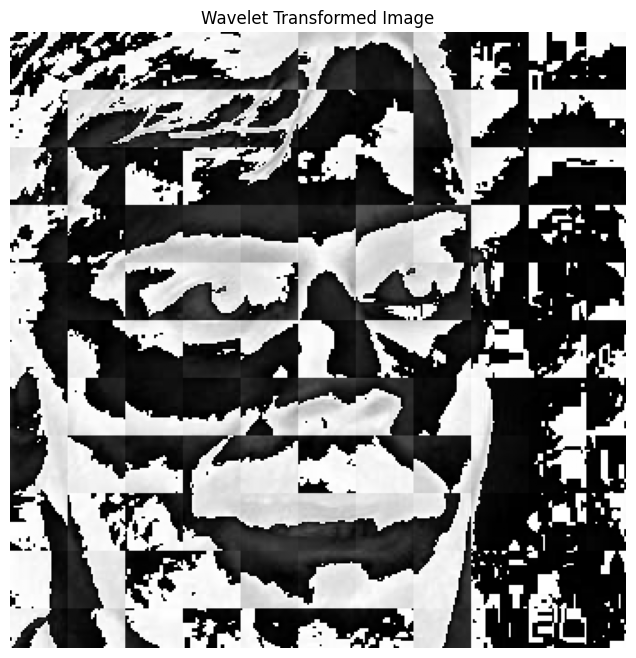

In [312]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# -----------------------------
# Wavelet transform function
# -----------------------------
def w2d(img, mode='haar', level=1):
    """
    Convert an image to its wavelet transformed version.
    Only detail coefficients are kept (approximation is set to 0).
    """
    # Convert to grayscale
    imArray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Convert to float and normalize
    imArray = np.float32(imArray) / 255.0
    
    # Compute wavelet coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Zero out approximation coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # Reconstruct image from modified coefficients
    imArray_H = pywt.waverec2(coeffs_H, mode)
    
    # Convert back to 0-255
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

# -----------------------------
# Load a cropped image
# -----------------------------
cropped_image_path = "./dataset/cropped/Virat Kohli/Virat Kohli1.png"
cropped_image = cv2.imread(cropped_image_path)
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)  # Convert BGR -> RGB

# -----------------------------
# Apply wavelet transform
# -----------------------------
im_har = w2d(cropped_image, mode='db1', level=5)

# -----------------------------
# Display
# -----------------------------
plt.figure(figsize=(8, 8))
plt.imshow(im_har, cmap='gray')
plt.axis('off')
plt.title("Wavelet Transformed Image")
plt.show()


In [313]:
""" FOR COMPUTER THIS TYPE OF DETAILINGS ARE VERY IMPORTANT BECAUSE IT IDENTIFY THE DETAILS USING THIS BLACK AND WHITE ONLY """

' FOR COMPUTER THIS TYPE OF DETAILINGS ARE VERY IMPORTANT BECAUSE IT IDENTIFY THE DETAILS USING THIS BLACK AND WHITE ONLY '

In [314]:
"""FOR THIS WE NEED TO GET TO KNOW ABOUT THE SIGNAL PROCESSING AND FREQUENCY DOMAIN , TIME DOMAIN 
 FOREIER TRANSFORM , AND HOW TO SHOW THE IMAGE AS A FREQUENCY BECAUSE BOTH ARE SIGNALS ONLY """

'FOR THIS WE NEED TO GET TO KNOW ABOUT THE SIGNAL PROCESSING AND FREQUENCY DOMAIN , TIME DOMAIN \n FOREIER TRANSFORM , AND HOW TO SHOW THE IMAGE AS A FREQUENCY BECAUSE BOTH ARE SIGNALS ONLY '

In [315]:
"""FOREIER TRANSFORM WILL DO LIKE RETREVING THE BASE SIGNAL OF ANY SIGNALS , LIKE FROM WHAT THEY MADE UP OFF IS GET RETRIVED """

'FOREIER TRANSFORM WILL DO LIKE RETREVING THE BASE SIGNAL OF ANY SIGNALS , LIKE FROM WHAT THEY MADE UP OFF IS GET RETRIVED '

In [316]:
celebrity_file_names_dict

{'cropped': [],
 'lionel messi': ['dataset\\cropped\\lionel messi\\lionel messi1.png',
  'dataset\\cropped\\lionel messi\\lionel messi2.png',
  'dataset\\cropped\\lionel messi\\lionel messi3.png',
  'dataset\\cropped\\lionel messi\\lionel messi4.png',
  'dataset\\cropped\\lionel messi\\lionel messi5.png',
  'dataset\\cropped\\lionel messi\\lionel messi6.png',
  'dataset\\cropped\\lionel messi\\lionel messi7.png',
  'dataset\\cropped\\lionel messi\\lionel messi8.png',
  'dataset\\cropped\\lionel messi\\lionel messi9.png',
  'dataset\\cropped\\lionel messi\\lionel messi10.png',
  'dataset\\cropped\\lionel messi\\lionel messi11.png',
  'dataset\\cropped\\lionel messi\\lionel messi12.png',
  'dataset\\cropped\\lionel messi\\lionel messi13.png',
  'dataset\\cropped\\lionel messi\\lionel messi14.png',
  'dataset\\cropped\\lionel messi\\lionel messi15.png',
  'dataset\\cropped\\lionel messi\\lionel messi16.png',
  'dataset\\cropped\\lionel messi\\lionel messi17.png',
  'dataset\\cropped\\lion

In [317]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'cropped': 0,
 'lionel messi': 1,
 'michael jackson': 2,
 'Narendra Modi': 3,
 'Pawan Kalyan': 4,
 'Ratan Tata': 5,
 'Virat Kohli': 6}

In [318]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])


In [319]:
len(x[0])

4096

In [320]:
x[0]

array([[120],
       [112],
       [113],
       ...,
       [  3],
       [  4],
       [  1]], dtype=uint8)

In [321]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(135, 4096)

In [322]:
x[0]

array([120., 112., 113., ...,   3.,   4.,   1.])

In [323]:
"""DATA CLEAN PROCESSING IS FINISHED , NOW ITS TIME TO TRAIN THE MODEL"""

'DATA CLEAN PROCESSING IS FINISHED , NOW ITS TIME TO TRAIN THE MODEL'

In [324]:
""" USING SVM AFTER THAT GRIDSEARCH"""

' USING SVM AFTER THAT GRIDSEARCH'

In [325]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [326]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [327]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.7941176470588235

In [328]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         5
           4       0.76      1.00      0.87        13
           5       0.40      1.00      0.57         2
           6       1.00      0.67      0.80         3

    accuracy                           0.79        34
   macro avg       0.69      0.75      0.69        34
weighted avg       0.73      0.79      0.74        34



In [329]:
"""GRIDSEARCH CV"""

'GRIDSEARCH CV'

In [330]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [331]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}


In [332]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,svm,0.792381,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.614286,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.703333,{'logisticregression__C': 5}


In [335]:
best_estimators['svm'].score(x_test,y_test)

0.7058823529411765

In [337]:
best_estimators['random_forest'].score(x_test,y_test)

0.6470588235294118

In [338]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8823529411764706

In [340]:
""" ACCORDING TO THE SCORE LOGISTIC DID THE BEST , SO WE USE LOGISTIC REGRESSION ONLY  """

' ACCORDING TO THE SCORE LOGISTIC DID THE BEST , SO WE USE LOGISTIC REGRESSION ONLY  '

In [341]:
model=best_estimators['logistic_regression']

In [342]:
model.score(x_test,y_test)

0.8823529411764706

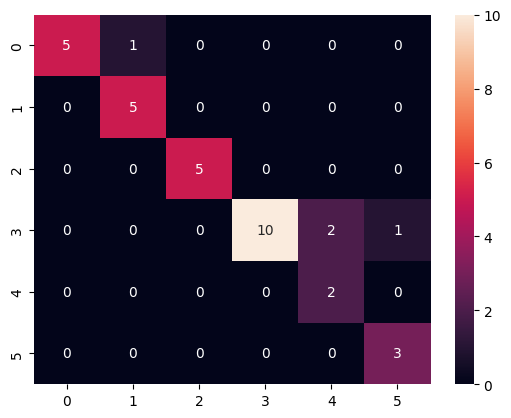

In [345]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cm,annot=True)
plt.show()

In [346]:
class_dict

{'cropped': 0,
 'lionel messi': 1,
 'michael jackson': 2,
 'Narendra Modi': 3,
 'Pawan Kalyan': 4,
 'Ratan Tata': 5,
 'Virat Kohli': 6}

In [348]:
"""TO SAVE OUR MODEL WE USE JOBLIB"""

'TO SAVE OUR MODEL WE USE JOBLIB'

In [349]:
!pip install joblib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [351]:
import joblib
joblib.dump(model,'ML_model.pkl')

['ML_model.pkl']

In [352]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))